## Analysis of Walmart Sales Data 
Objective: To figure out if factors such as air temperature, fuel price, consumer price index and unemployment have an influence on its revenue.
The data contains the following columns:

Store: Store number,
Date: Sales week start date,
Weekly_Sales: Sales,
Holiday_Flag: Mark on the presence or absence of a holiday,
Temperature: Air temperature in the region,
Fuel_Price: Fuel cost in the region,
CPI: Consumer price index,
Unemployment: Unemployment rate.

The dataset contains 6435 rows and 8 columns, there were no null values or duplicate values. The Date column was converted to DateTime format.


## CLEANING AND ANALYSES

In [4]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#importing the dataset
path = (r"C:\Users\chiso\Documents\Brainwave_Matrix\Dataset\Walmart_Sales.csv")
df = pd.read_csv(path)
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [6]:
#checking for dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
#getting the descriptive statistics
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
#checking for null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [14]:
#checking for duplicate values
df.duplicated().sum()

0

In [16]:
#converting date column to DateTime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

#To chech if the date has been converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [18]:
#Year-over-Year Sales Growth
#Extract Year and Month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42


## ANALYSIS OF SALES TREND
Objective: How do sales vary across different stores and over time?

In [23]:
#Total Sales by Store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
print(store_sales)

    Store  Weekly_Sales
0       1  2.224028e+08
1       2  2.753824e+08
2       3  5.758674e+07
3       4  2.995440e+08
4       5  4.547569e+07
5       6  2.237561e+08
6       7  8.159828e+07
7       8  1.299512e+08
8       9  7.778922e+07
9      10  2.716177e+08
10     11  1.939628e+08
11     12  1.442872e+08
12     13  2.865177e+08
13     14  2.889999e+08
14     15  8.913368e+07
15     16  7.425243e+07
16     17  1.277821e+08
17     18  1.551147e+08
18     19  2.066349e+08
19     20  3.013978e+08
20     21  1.081179e+08
21     22  1.470756e+08
22     23  1.987506e+08
23     24  1.940160e+08
24     25  1.010612e+08
25     26  1.434164e+08
26     27  2.538559e+08
27     28  1.892637e+08
28     29  7.714155e+07
29     30  6.271689e+07
30     31  1.996139e+08
31     32  1.668192e+08
32     33  3.716022e+07
33     34  1.382498e+08
34     35  1.315207e+08
35     36  5.341221e+07
36     37  7.420274e+07
37     38  5.515963e+07
38     39  2.074455e+08
39     40  1.378703e+08
40     41  1.813

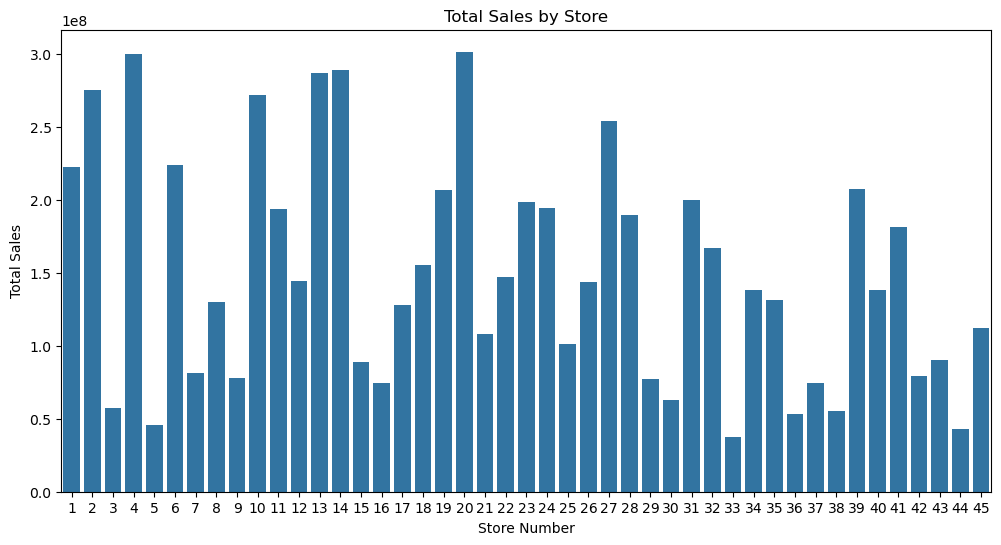

In [25]:
#Visualizing Total Sales
plt.figure(figsize=(12,6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales)
plt.title('Total Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.show()

   Year  Weekly_Sales
0  2010  2.288886e+09
1  2011  2.448200e+09
2  2012  2.000133e+09


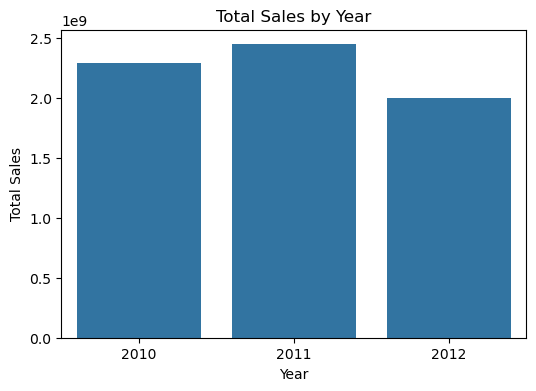

In [27]:
#Calculate Annual Sales
annual_sales = df.groupby('Year')['Weekly_Sales'].sum().reset_index()
print(annual_sales)

#Visualize Annual Sales
plt.figure(figsize=(6,4))
sns.barplot(x='Year', y='Weekly_Sales', data=annual_sales)
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


In [40]:
#Calculate the date with the highest sales
#Group by date and sum weekly sales
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Find the date with the highest sales
max_sales_date = weekly_sales.loc[weekly_sales['Weekly_Sales'].idxmax()]

# Print the date and the corresponding highest sales
print(f"The date with the highest sales is {max_sales_date['Date']} with sales of {max_sales_date['Weekly_Sales']}")


The date with the highest sales is 2010-12-24 00:00:00 with sales of 80931415.6


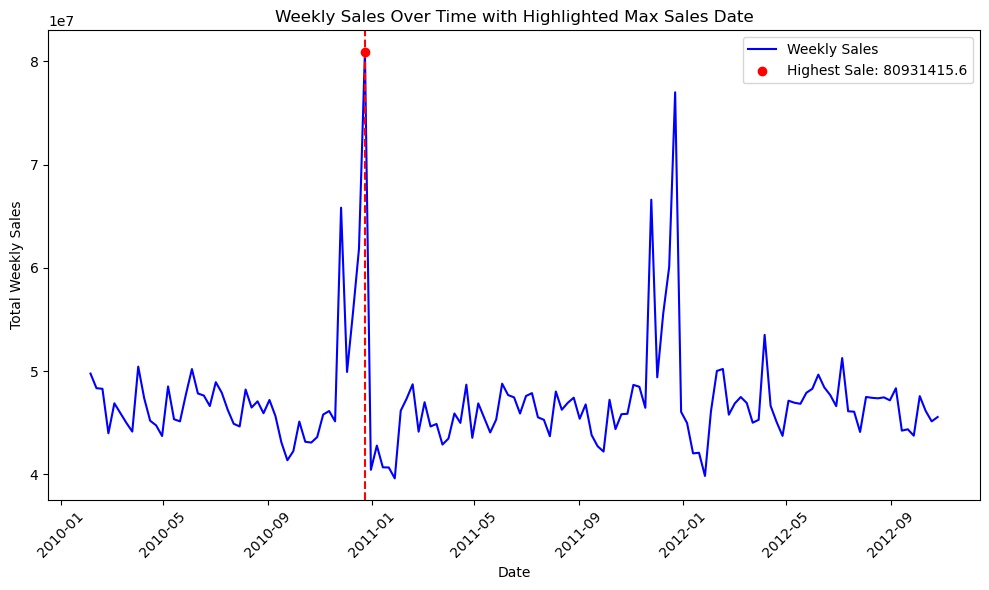

In [42]:
# Plot the weekly sales over time
plt.figure(figsize=(10,6))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], label='Weekly Sales', color='blue')

# Highlight the max sales date with a red dot and label
plt.scatter(max_sales_date['Date'], max_sales_date['Weekly_Sales'], color='red', label=f'Highest Sale: {max_sales_date["Weekly_Sales"]}', zorder=5)
plt.axvline(x=max_sales_date['Date'], color='red', linestyle='--')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.title('Weekly Sales Over Time with Highlighted Max Sales Date')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
#To check if there was holiday during the date with highest sales
# Group by date and sum weekly sales
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Find the date with the highest sales
max_sales_date = weekly_sales.loc[weekly_sales['Weekly_Sales'].idxmax()]['Date']

# Filter the original dataframe to get the row corresponding to the max sales date
max_sales_row = df[df['Date'] == max_sales_date]

# Check if there was a holiday on that day
if max_sales_row['Holiday_Flag'].iloc[0] == 1:
    print(f"On {max_sales_date}, there was a holiday, and the sales were the highest.")
else:
    print(f"On {max_sales_date}, there was no holiday, but the sales were the highest.")


On 2010-12-24 00:00:00, there was no holiday, but the sales were the highest.


## FINDINGS
1) The analysis showed that store number 20 has generated more sales than any other stores over the years.
This can be as a result of its location or customer service, but no data to prove that. So, further analysis to know the reason is recommended.

2) The year 2011 had the highest total sales recorded.

3) The analysis also showed that the highest weekly sales occurred in 2010-12-24 and there wasn't a holiday on that day. Further analysis can be carried out to know the reason for that.

## Impact of Holidays on Sales
Objective: Do holidays affect sales significantly?

In [37]:
#Average Sales During Holiday vs. Non-Holiday Weeks
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
print(holiday_sales)

   Holiday_Flag  Weekly_Sales
0             0  1.041256e+06
1             1  1.122888e+06


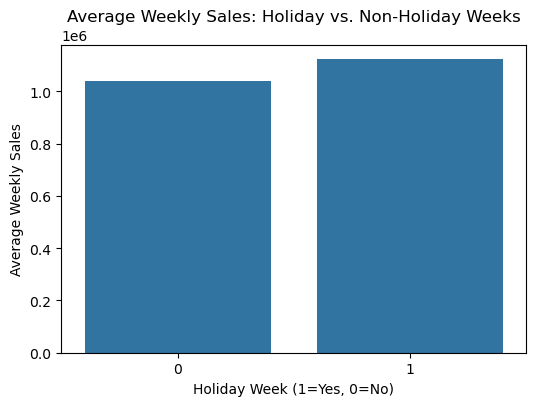

In [39]:
#Visualize Holiday Impact
plt.figure(figsize=(6,4))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=holiday_sales)
plt.title('Average Weekly Sales: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Week (1=Yes, 0=No)')
plt.ylabel('Average Weekly Sales')
plt.show()

    Store  Weekly_Sales
0       1   1665747.656
1       2   2079266.900
2       3    437811.050
3       4   2243102.624
4       5    359501.607
5       6   1680907.927
6       7    672400.265
7       8    975330.860
8       9    588950.821
9      10   2113755.949
10     11   1448394.485
11     12   1138140.420
12     13   2113043.806
13     14   2120582.998
14     15    706406.018
15     16    566733.646
16     17    979796.971
17     18   1169422.161
18     19   1577046.734
19     20   2249035.081
20     21    826491.309
21     22   1084874.656
22     23   1462542.294
23     24   1475098.251
24     25    739676.842
25     26   1072046.849
26     27   1892299.278
27     28   1478244.605
28     29    606957.889
29     30    436859.307
30     31   1500026.030
31     32   1203784.083
32     33    262594.519
33     34   1041978.089
34     35   1074348.457
35     36    367640.630
36     37    507525.050
37     38    381509.878
38     39   1551127.480
39     40   1008034.075
40     41   1334

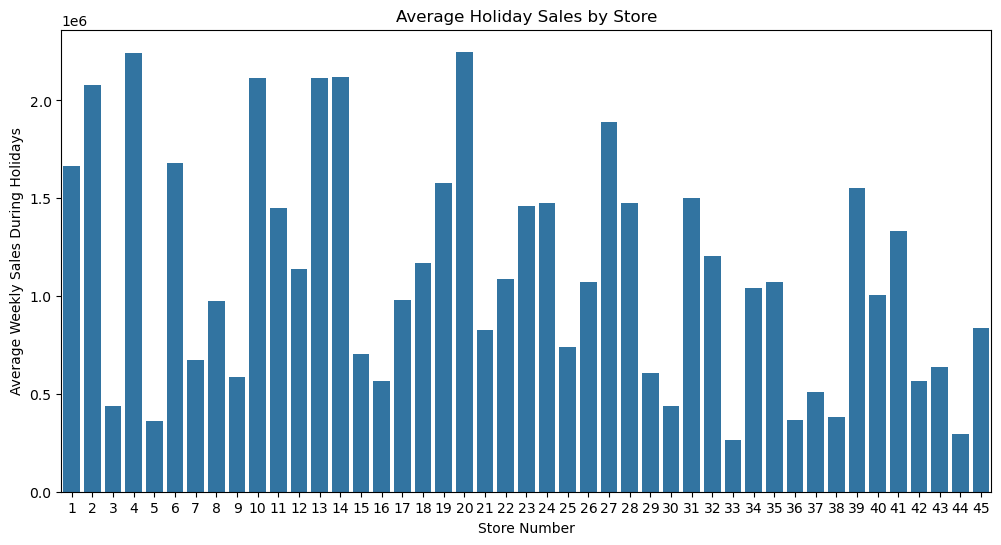

In [75]:
#Holiday Impact by Store
#Average Sales During Holidays by Store

store_holiday_sales = df[df['Holiday_Flag'] == 1].groupby('Store')['Weekly_Sales'].mean().reset_index()
print(store_holiday_sales)

#Visualize
plt.figure(figsize=(12,6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_holiday_sales)
plt.title('Average Holiday Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales During Holidays')
plt.show()

## FINDINGS
From the analysis, we can see that holidays have impact on sales generated by the store.
Store 20 made the highest period during the holiday period
This means that more goods should be stocked in to avoid the goods not reaching the number of customers available.

## Relationship Between Sales and External Factors
Objective: Is there a relationship between sales and factors like temperature, fuel price, CPI, and unemployment?

In [46]:
# 1. Correlation Matrix
correlation = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
print(correlation)

              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000


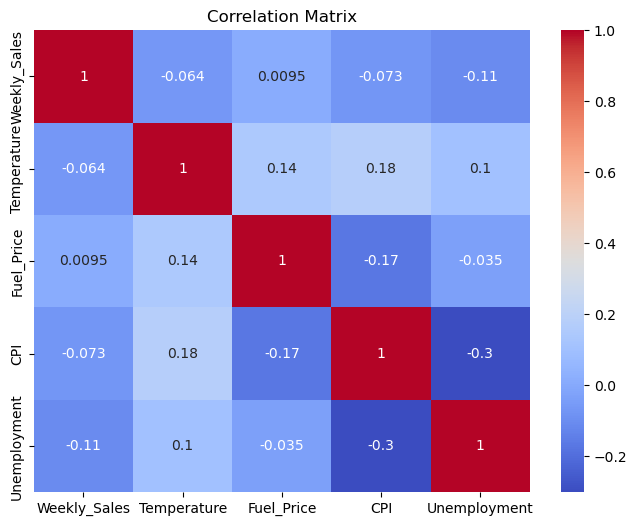

In [48]:
#Visualize Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

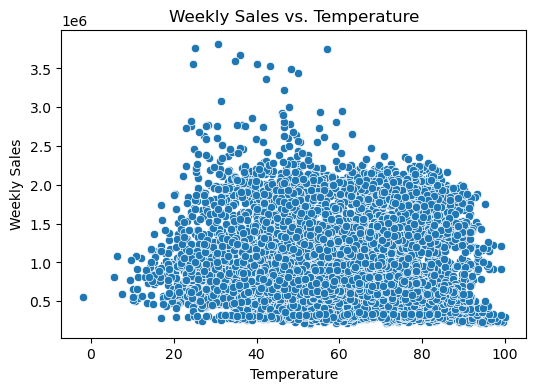

In [50]:
#Scatter Plots
#For each external factor, create a scatter plot to visualize the relationship.
#Sales vs. Temperature

plt.figure(figsize=(6,4))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

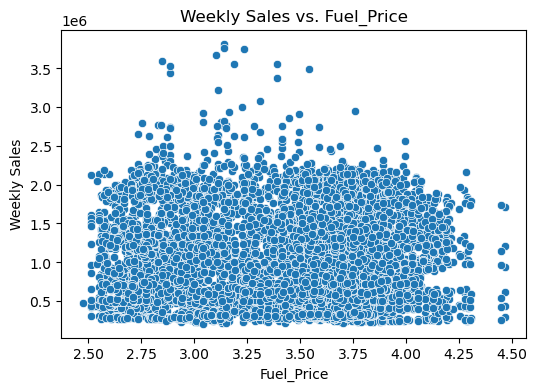

In [52]:
#Sales vs. Fuel price

plt.figure(figsize=(6,4))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Fuel_Price')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly Sales')
plt.show()

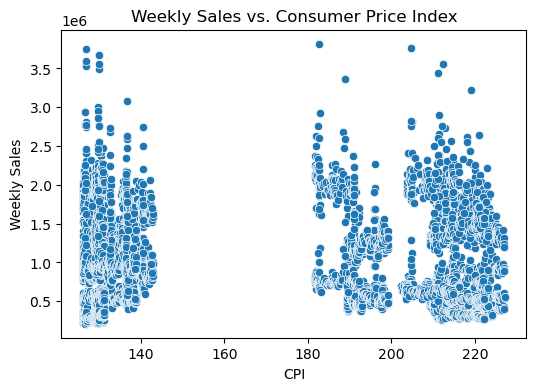

In [54]:
#Sales vs. Consumer Price Index

plt.figure(figsize=(6,4))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Consumer Price Index')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

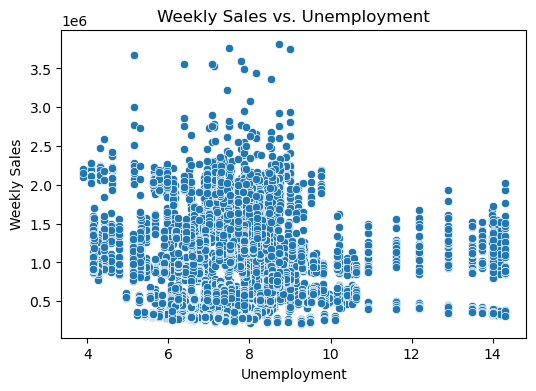

In [56]:
#Sales vs. Unemployment

plt.figure(figsize=(6,4))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

## Sales Forecasting
Objective: Can future sales be predicted based on past data?

In [59]:
# Features and target variable
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

In [61]:
#Splitting the Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#Building the Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
#Making Predictions
y_pred = model.predict(X_test)

In [67]:
#Evaluating the Model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 316517319524.9036
R^2 Score: 0.017498572820902725


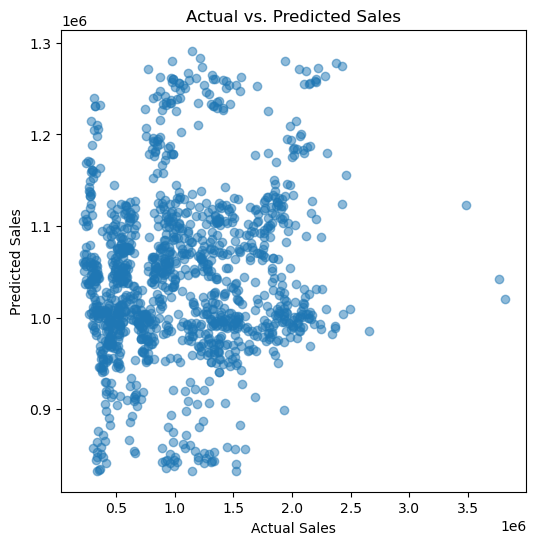

In [69]:
#Visualizing Actual vs. Predicted Sales
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

In [77]:
#Advanced Predictive Modeling (Using Random Forest Regressor)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 287915825037.22205
Random Forest R^2 Score: 0.10628047327356116


## FINDINGS
1) Analysis showed that there is a negative correlation between temperature, consumer price index (CPI) unemployment and weekly sales, as these factors are increasing, there is possibility of sales dropping while there is weak correlation between fuel price and weekly sales.

2) Both the Random Forest and Linear Regression models are performing poorly, with high MSE and low R² scores.
The Linear Regression model (with R² = 1.75%) is performing worse than the Random Forest model (with R² = 10.6%) in terms of explaining the variance in sales data.
Neither model is providing accurate predictions, and the small R² values indicate that the independent variables used may not have a strong relationship with the sales data, or there may be other underlying patterns that the models are not capturing.